<a href="https://colab.research.google.com/github/jpmaldonadoc/Project-6220-Juan-Maldonado-ID-40189762/blob/main/6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Python *Modules*

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning Modules
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV



Upload Files

In [ ]:
!pip install pycaret

In [2]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jpmaldonadoc/Project-6220/main/heart_2020_cleaned.csv')
df.head(n=25)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,Yes,No,No,3,30,No,Female,55-59,Yes,5,Yes,No,Yes,No
1,20.34,No,No,Yes,0,0,No,Female,80 or older,Yes,7,No,No,No,No
2,26.58,Yes,No,No,20,30,No,Male,65-69,Yes,8,Yes,No,No,No
3,24.21,No,No,No,0,0,No,Female,75-79,No,6,No,No,Yes,No
4,23.71,No,No,No,28,0,Yes,Female,40-44,Yes,8,No,No,No,No
5,28.87,Yes,No,No,6,0,Yes,Female,75-79,No,12,No,No,No,Yes
6,21.63,No,No,No,15,0,No,Female,70-74,Yes,4,Yes,No,Yes,No
7,31.64,Yes,No,No,5,0,Yes,Female,80 or older,No,9,Yes,No,No,No
8,26.45,No,No,No,0,0,No,Female,80 or older,No,5,No,Yes,No,No
9,40.69,No,No,No,0,0,Yes,Male,65-69,Yes,10,No,No,No,No


In [3]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

In [4]:
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    df[col] = df[col]/df[col].max()

In [5]:
# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               350 non-null    float64
 1   Smoking           350 non-null    int64  
 2   AlcoholDrinking   350 non-null    int64  
 3   Stroke            350 non-null    int64  
 4   PhysicalHealth    350 non-null    float64
 5   MentalHealth      350 non-null    float64
 6   DiffWalking       350 non-null    int64  
 7   Sex               350 non-null    int64  
 8   AgeCategory       350 non-null    float64
 9   PhysicalActivity  350 non-null    int64  
 10  SleepTime         350 non-null    float64
 11  Asthma            350 non-null    int64  
 12  KidneyDisease     350 non-null    int64  
 13  SkinCancer        350 non-null    int64  
 14  HeartDisease      350 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 41.1 KB


Classes

In [7]:
y = df ['HeartDisease']
target = df['HeartDisease'].to_numpy()

Features

Data Matrix

In [8]:
X = df.iloc[:,0:11]
X.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime
0,0.283567,1,0,0,0.100000,1.0,0,0,0.7125,1,0.333333
1,0.347455,0,0,1,0.000000,0.0,0,0,1.0000,1,0.466667
2,0.454049,1,0,0,0.666667,1.0,0,1,0.8375,1,0.533333
3,0.413563,0,0,0,0.000000,0.0,0,0,0.9625,0,0.400000
4,0.405022,0,0,0,0.933333,0.0,1,0,0.5250,1,0.533333
5,0.493167,1,0,0,0.200000,0.0,1,0,0.9625,0,0.800000
6,0.369491,0,0,0,0.500000,0.0,0,0,0.9000,1,0.266667
7,0.540485,1,0,0,0.166667,0.0,1,0,1.0000,0,0.600000
8,0.451828,0,0,0,0.000000,0.0,0,0,1.0000,0,0.333333
9,0.695080,0,0,0,0.000000,0.0,1,1,0.8375,1,0.666667


In [9]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,350.0,0.491711,0.108556,0.283567,0.42061,0.469081,0.550820,1.0
Smoking,350.0,0.425714,0.495159,0.000000,0.00000,0.000000,1.000000,1.0
AlcoholDrinking,350.0,0.025714,0.158508,0.000000,0.00000,0.000000,0.000000,1.0
Stroke,350.0,0.068571,0.253086,0.000000,0.00000,0.000000,0.000000,1.0
PhysicalHealth,350.0,0.189048,0.327422,0.000000,0.00000,0.000000,0.200000,1.0
MentalHealth,350.0,0.128476,0.274408,0.000000,0.00000,0.000000,0.100000,1.0
DiffWalking,350.0,0.282857,0.451032,0.000000,0.00000,0.000000,1.000000,1.0
Sex,350.0,0.317143,0.466030,0.000000,0.00000,0.000000,1.000000,1.0
AgeCategory,350.0,0.849893,0.135981,0.262500,0.77500,0.900000,0.962500,1.0
PhysicalActivity,350.0,0.645714,0.478981,0.000000,0.00000,1.000000,1.000000,1.0


In [10]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,0.491711,0.108556,0.283567,0.420610,0.469081,0.550820,1.000000
PhysicalHealth,0.189048,0.327422,0.000000,0.000000,0.000000,0.200000,1.000000
MentalHealth,0.128476,0.274408,0.000000,0.000000,0.000000,0.100000,1.000000
AgeCategory,0.849893,0.135981,0.262500,0.775000,0.900000,0.962500,1.000000
SleepTime,0.480952,0.110852,0.133333,0.400000,0.466667,0.533333,1.000000


*Notice that the data is not standardized. So we need to standarize it.*

---



In [11]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,350.0,-4.366349e-16,1.001432,-1.920133,-0.655907,-0.208760,0.545285,4.688984
Smoking,350.0,9.262432e-17,1.001432,-0.860984,-0.860984,-0.860984,1.161462,1.161462
AlcoholDrinking,350.0,2.639159e-16,1.001432,-0.162459,-0.162459,-0.162459,-0.162459,6.155395
Stroke,350.0,1.747808e-16,1.001432,-0.271329,-0.271329,-0.271329,-0.271329,3.685557
PhysicalHealth,350.0,8.818343e-17,1.001432,-0.578208,-0.578208,-0.578208,0.033498,2.480324
MentalHealth,350.0,-1.871519e-17,1.001432,-0.468865,-0.468865,-0.468865,-0.103922,3.180567
DiffWalking,350.0,1.440118e-16,1.001432,-0.628031,-0.628031,-0.628031,1.592279,1.592279
Sex,350.0,-5.709718e-17,1.001432,-0.681495,-0.681495,-0.681495,1.467363,1.467363
AgeCategory,350.0,-2.193008e-15,1.001432,-4.325861,-0.551549,0.369015,0.829296,1.105466
PhysicalActivity,350.0,9.960287e-17,1.001432,-1.350030,-1.350030,0.740724,0.740724,0.740724


**Observations and variables**

In [13]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Data Visualisation**

Class Distribution

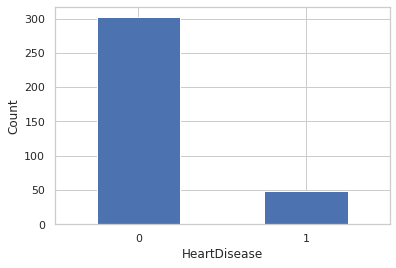

In [14]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

Box & Whisker Plots

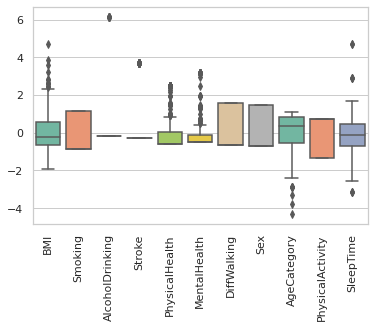

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

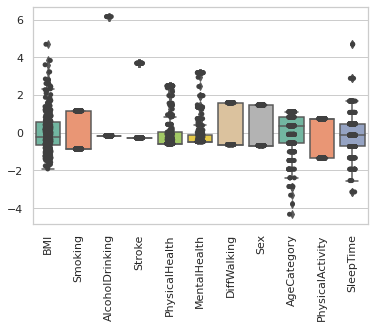

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Five Number Summary

In [19]:
df.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime
count,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02,3.500000e+02
mean,-4.366349e-16,9.262432e-17,2.639159e-16,1.747808e-16,8.818343e-17,-1.871519e-17,1.440118e-16,-5.709718e-17,-2.193008e-15,9.960287e-17,3.793791e-16
std,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00,1.001432e+00
min,-1.920133e+00,-8.609840e-01,-1.624591e-01,-2.713294e-01,-5.782081e-01,-4.688651e-01,-6.280305e-01,-6.814948e-01,-4.325861e+00,-1.350030e+00,-3.140373e+00
25%,-6.559073e-01,-8.609840e-01,-1.624591e-01,-2.713294e-01,-5.782081e-01,-4.688651e-01,-6.280305e-01,-6.814948e-01,-5.515492e-01,-1.350030e+00,-7.313198e-01
50%,-2.087597e-01,-8.609840e-01,-1.624591e-01,-2.713294e-01,-5.782081e-01,-4.688651e-01,-6.280305e-01,-6.814948e-01,3.690146e-01,7.407244e-01,-1.290564e-01
75%,5.452848e-01,1.161462e+00,-1.624591e-01,-2.713294e-01,3.349820e-02,-1.039219e-01,1.592279e+00,1.467363e+00,8.292964e-01,7.407244e-01,4.732069e-01
max,4.688984e+00,1.161462e+00,6.155395e+00,3.685557e+00,2.480324e+00,3.180567e+00,1.592279e+00,1.467363e+00,1.105466e+00,7.407244e-01,4.689050e+00


Pair Plot

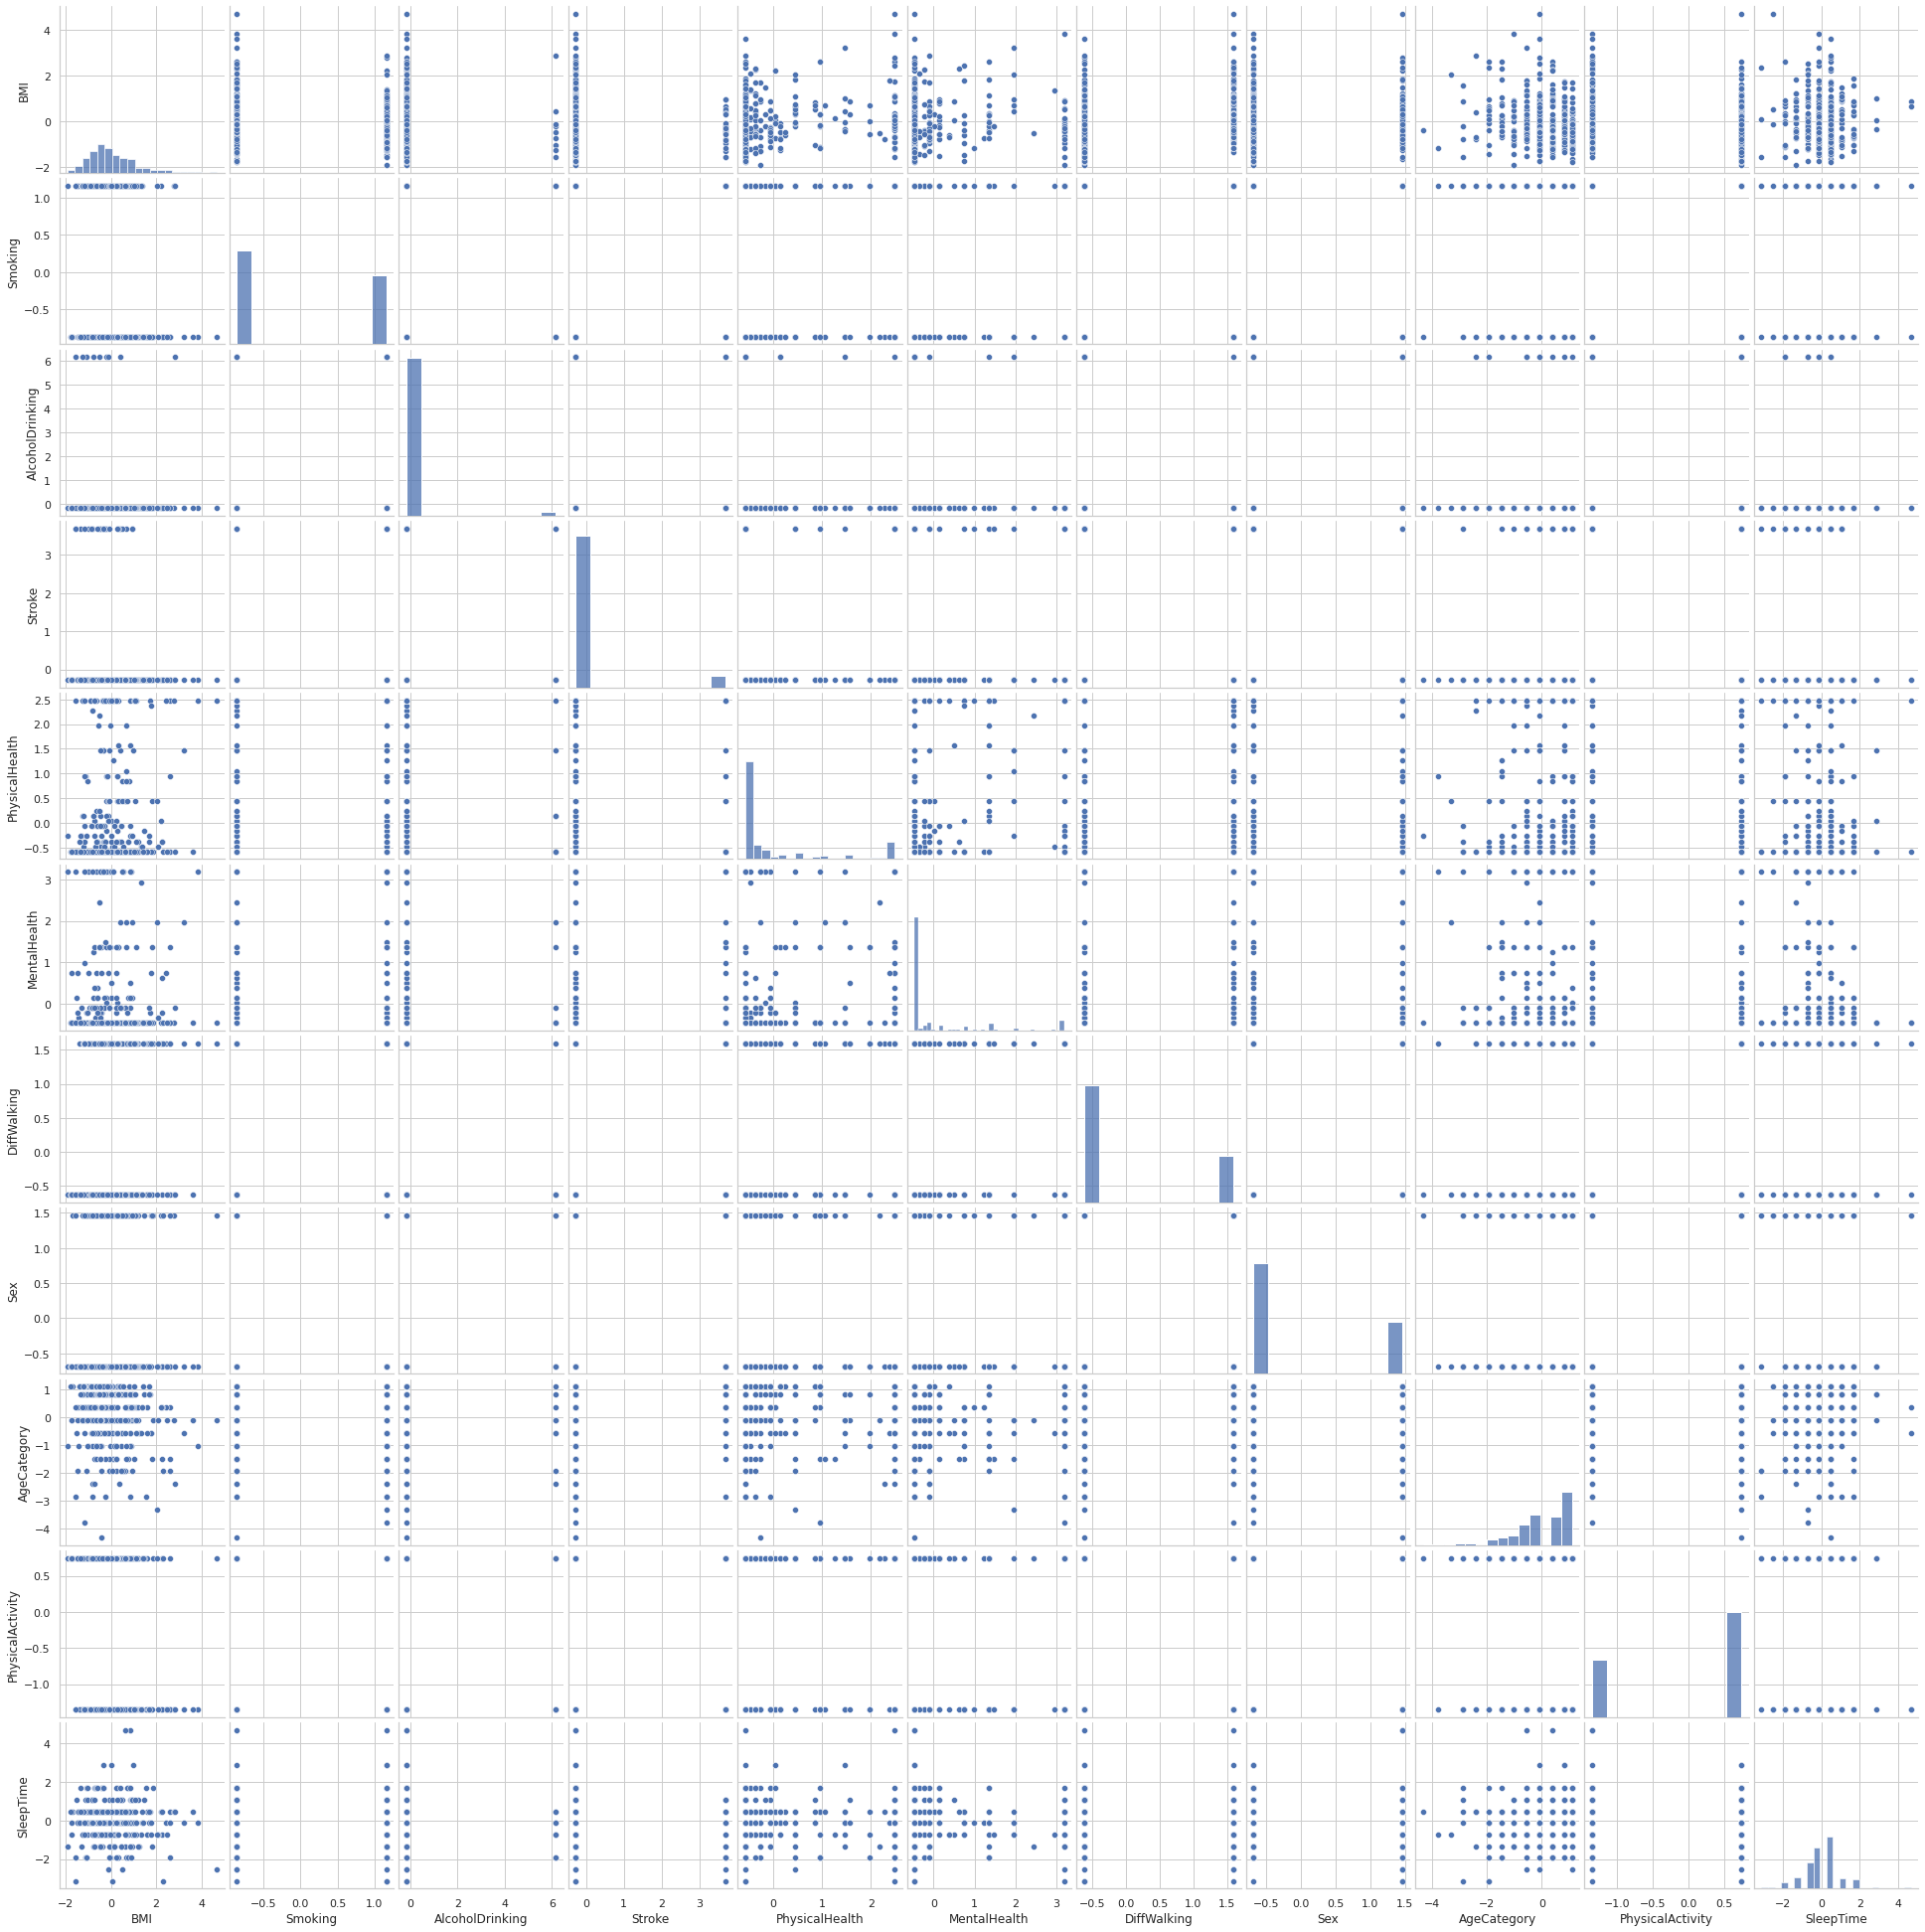

In [22]:
sns.pairplot(df)

Covariance

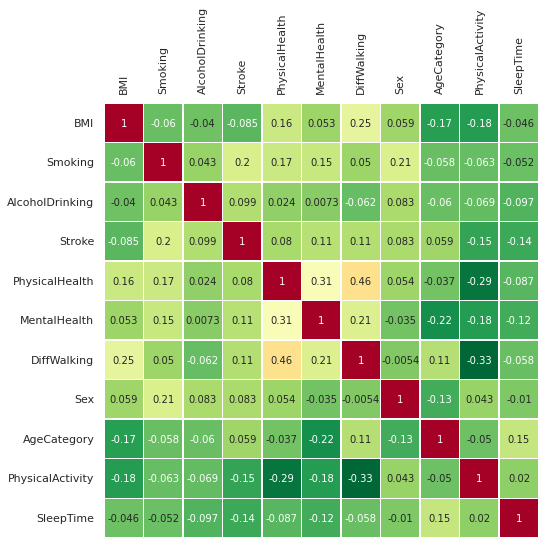

In [23]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.gcf().set_size_inches(15, 8)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
#plt.title('Covariance matrix')

Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

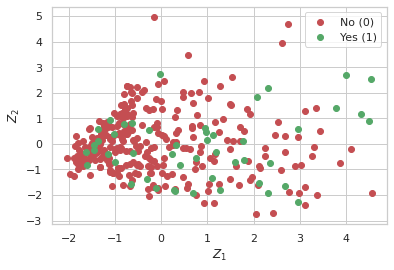

In [24]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(No)->0,  2(Yes)->1
idx_No = np.where(y == 0)
idx_Yes = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_No,0], Z[idx_No,1], c='r', label='No (0)')
plt.scatter(Z[idx_Yes,0], Z[idx_Yes,1], c='g', label='Yes (1)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

Eigenvectors

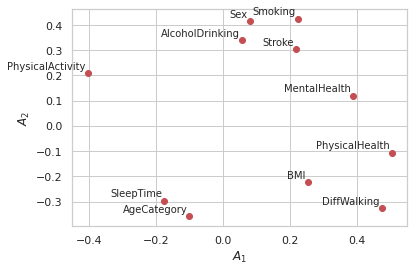

In [25]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


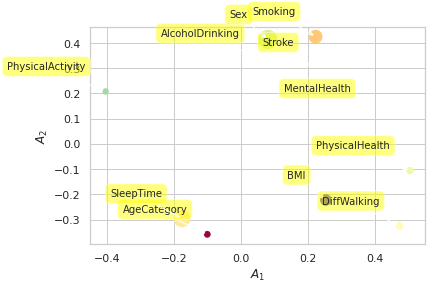

In [26]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

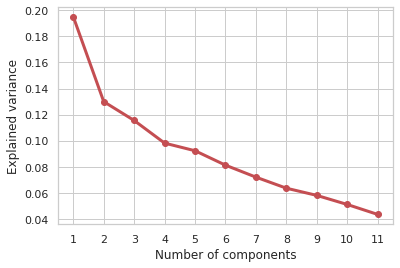

In [27]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

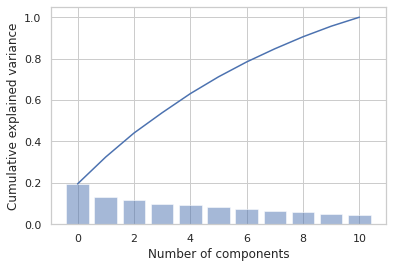

In [28]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Explained Variance per PC

In [29]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (19.5%)',
 '1': 'PC 2 (13.0%)',
 '10': 'PC 11 (4.3%)',
 '2': 'PC 3 (11.5%)',
 '3': 'PC 4 (9.8%)',
 '4': 'PC 5 (9.2%)',
 '5': 'PC 6 (8.1%)',
 '6': 'PC 7 (7.2%)',
 '7': 'PC 8 (6.4%)',
 '8': 'PC 9 (5.8%)',
 '9': 'PC 10 (5.1%)'}

Biplot

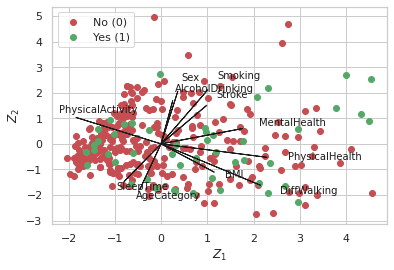

In [30]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_No,0], Z[idx_No,1], c='r', label='No (0)')
plt.scatter(Z[idx_Yes,0], Z[idx_Yes,1], c='g', label='Yes (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

Using PCA Librarry

In [31]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=ad51bb352832727063848d40f67999ce2dfbce6dccf1feed44037d5c613f104b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [32]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components=8, normalize=True)
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [33]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

     PC           feature   loading  type
0   PC1    PhysicalHealth  0.503398  best
1   PC2           Smoking  0.425277  best
2   PC3       AgeCategory -0.633057  best
3   PC4               Sex  0.646969  best
4   PC5   AlcoholDrinking  0.661284  best
5   PC6         SleepTime  0.612428  best
6   PC7            Stroke  0.517462  best
7   PC8           Smoking -0.688166  best
8   PC3               BMI  0.482526  weak
9   PC5      MentalHealth -0.452557  weak
10  PC1       DiffWalking  0.472380  weak
11  PC7  PhysicalActivity -0.411881  weak


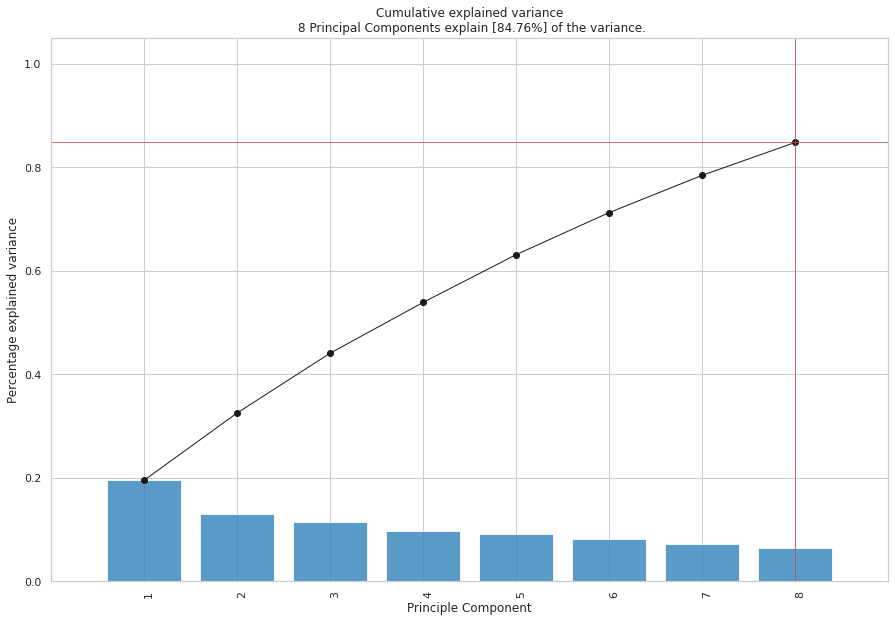

<Figure size 432x288 with 0 Axes>

In [34]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


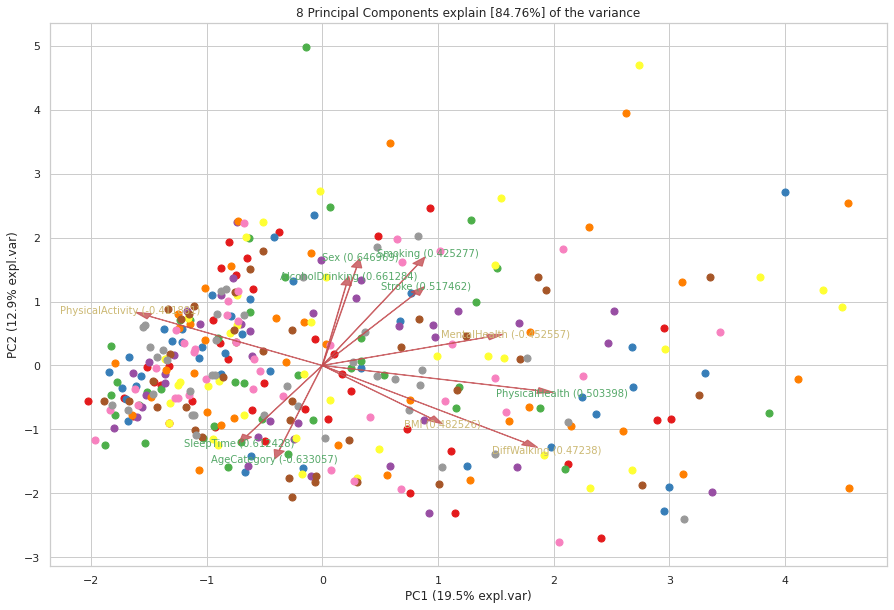

In [35]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


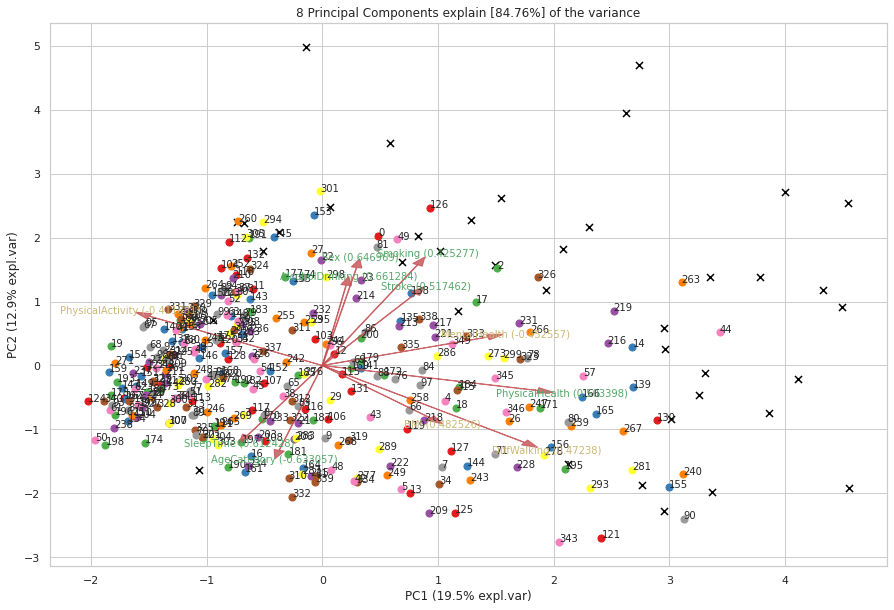

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fafa05cec10>)

In [36]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


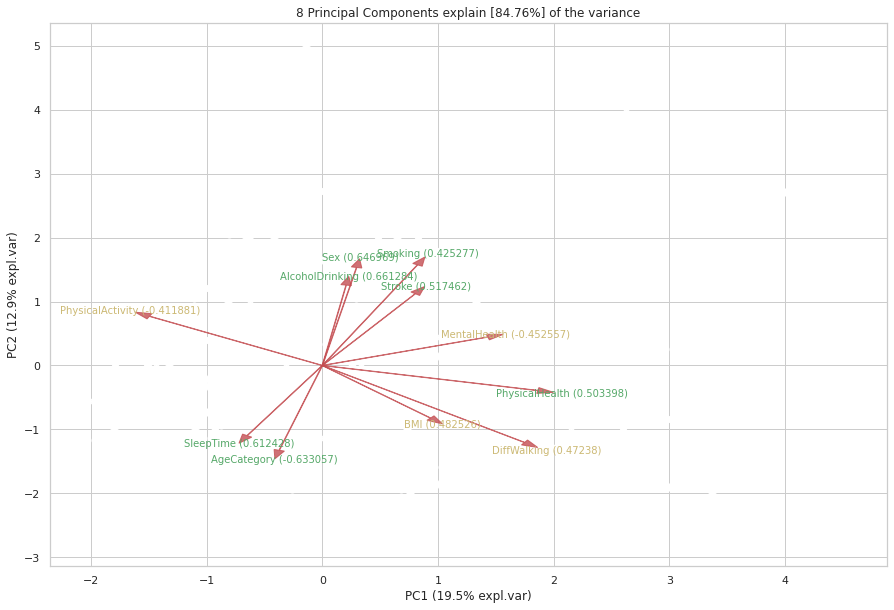

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faf9fd25450>)

In [37]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


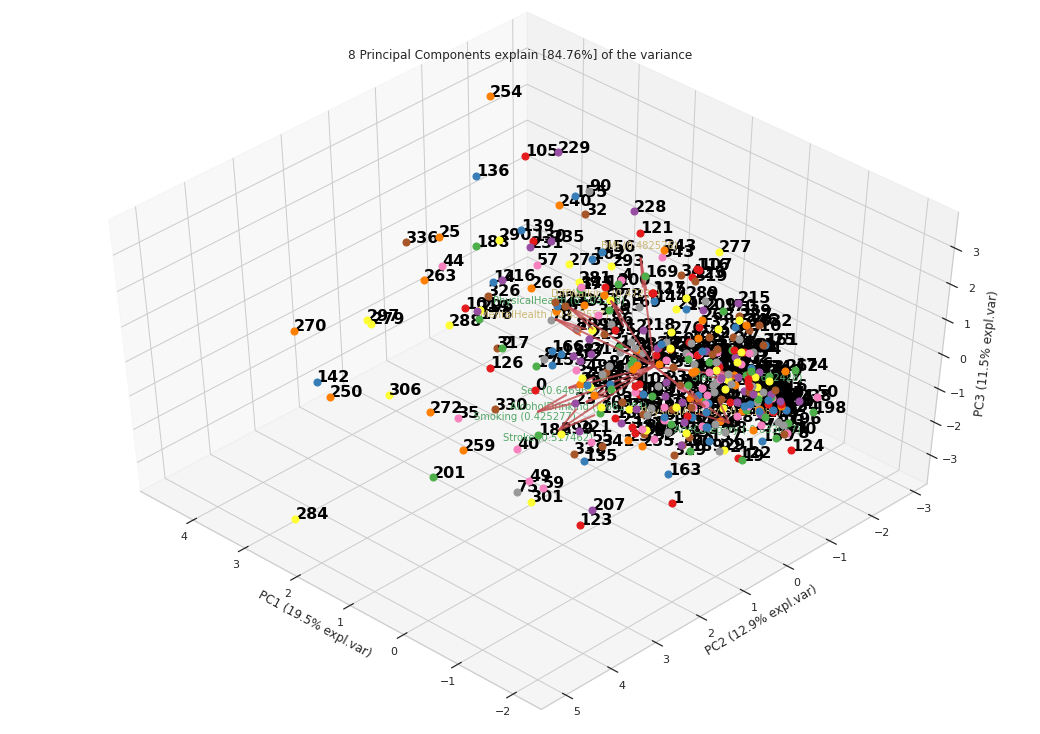

In [38]:
ax = model.biplot3d(legend=False)

Principal components

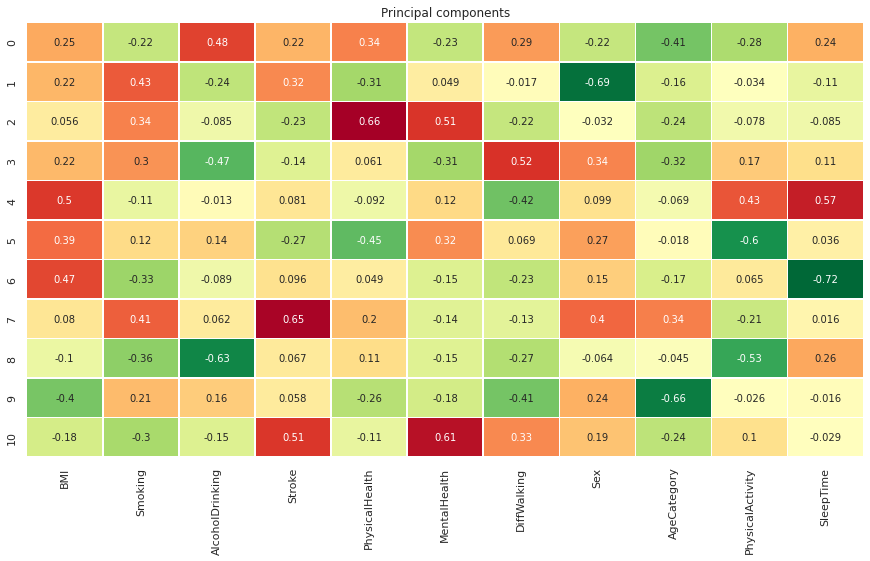

PC1:[ 0.25266487  0.22225782  0.05560628  0.21712527  0.50339808  0.38653477
  0.47238041  0.07995061 -0.1007467  -0.40391168 -0.17572088]
PC2:[-0.22218695  0.42527685  0.3396523   0.30321946 -0.10572455  0.12024308
 -0.32524006  0.41423318 -0.3583004   0.20800094 -0.29633927]


In [42]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=False)
plt.gcf().set_size_inches(15, 8)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

Hostelling's T2 Test

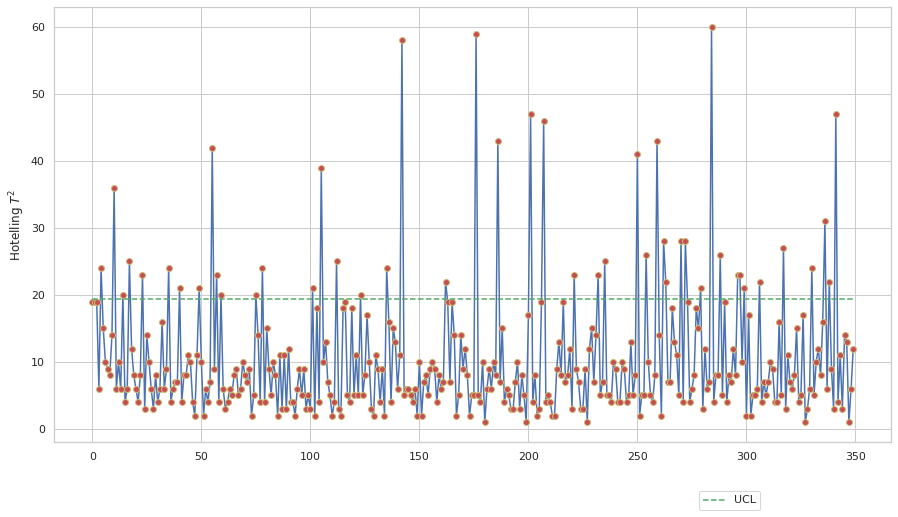

In [49]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2= p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
plt.gcf().set_size_inches(15, 8)
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [44]:
print(np.argwhere(Tsquare>UCL))

[[  4]
 [ 10]
 [ 14]
 [ 17]
 [ 23]
 [ 35]
 [ 40]
 [ 49]
 [ 55]
 [ 57]
 [ 59]
 [ 75]
 [ 78]
 [101]
 [105]
 [112]
 [123]
 [135]
 [142]
 [162]
 [176]
 [186]
 [201]
 [207]
 [221]
 [232]
 [235]
 [250]
 [254]
 [259]
 [262]
 [263]
 [270]
 [272]
 [279]
 [284]
 [288]
 [296]
 [297]
 [299]
 [306]
 [317]
 [330]
 [336]
 [338]
 [341]]


Control Charts for Principal Components

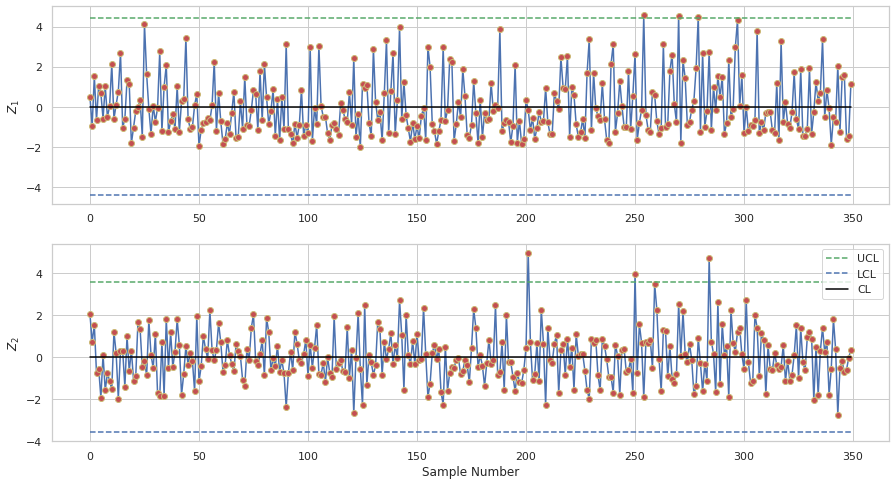

In [50]:
fig, (ax1, ax2) = plt.subplots(2,1)
plt.gcf().set_size_inches(15, 8)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

Out of Control Points

In [51]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[254]
 [270]
 [279]]
[]
[[201]
 [250]
 [284]]


In [52]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,-0.000000,1.001432,-1.920133,-0.655907,-0.208760,0.545285,4.688984
PhysicalHealth,0.000000,1.001432,-0.578208,-0.578208,-0.578208,0.033498,2.480324
MentalHealth,-0.000000,1.001432,-0.468865,-0.468865,-0.468865,-0.103922,3.180567
AgeCategory,-0.000000,1.001432,-4.325861,-0.551549,0.369015,0.829296,1.105466
SleepTime,0.000000,1.001432,-3.140373,-0.731320,-0.129056,0.473207,4.689050


In [53]:
fig = px.imshow(df[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),color_continuous_scale="Blues")
fig.update_layout(height=800)
fig.show()

We load the dataset again and adjust it to apply random forest

In [54]:
ml = pd.read_csv('https://raw.githubusercontent.com/jpmaldonadoc/Project-6220/main/heart_2020_cleaned.csv')
ml.head(n=25)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,Yes,No,No,3,30,No,Female,55-59,Yes,5,Yes,No,Yes,No
1,20.34,No,No,Yes,0,0,No,Female,80 or older,Yes,7,No,No,No,No
2,26.58,Yes,No,No,20,30,No,Male,65-69,Yes,8,Yes,No,No,No
3,24.21,No,No,No,0,0,No,Female,75-79,No,6,No,No,Yes,No
4,23.71,No,No,No,28,0,Yes,Female,40-44,Yes,8,No,No,No,No
5,28.87,Yes,No,No,6,0,Yes,Female,75-79,No,12,No,No,No,Yes
6,21.63,No,No,No,15,0,No,Female,70-74,Yes,4,Yes,No,Yes,No
7,31.64,Yes,No,No,5,0,Yes,Female,80 or older,No,9,Yes,No,No,No
8,26.45,No,No,No,0,0,No,Female,80 or older,No,5,No,Yes,No,No
9,40.69,No,No,No,0,0,Yes,Male,65-69,Yes,10,No,No,No,No


In [55]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
ml['AgeCategory'] = ml['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
ml['AgeCategory'] = ml['AgeCategory'].astype('float')

In [56]:
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    ml[col] = ml[col]/ml[col].max()

In [57]:
# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if ml[col].dtype == 'O':
        le = LabelEncoder()
        ml[col] = le.fit_transform(ml[col])

In [58]:
X = ml.iloc[:,0:15]
X.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0.283567,1,0,0,0.100000,1.0,0,0,0.7125,1,0.333333,1,0,1,0
1,0.347455,0,0,1,0.000000,0.0,0,0,1.0000,1,0.466667,0,0,0,0
2,0.454049,1,0,0,0.666667,1.0,0,1,0.8375,1,0.533333,1,0,0,0
3,0.413563,0,0,0,0.000000,0.0,0,0,0.9625,0,0.400000,0,0,1,0
4,0.405022,0,0,0,0.933333,0.0,1,0,0.5250,1,0.533333,0,0,0,0
5,0.493167,1,0,0,0.200000,0.0,1,0,0.9625,0,0.800000,0,0,0,1
6,0.369491,0,0,0,0.500000,0.0,0,0,0.9000,1,0.266667,1,0,1,0
7,0.540485,1,0,0,0.166667,0.0,1,0,1.0000,0,0.600000,1,0,0,0
8,0.451828,0,0,0,0.000000,0.0,0,0,1.0000,0,0.333333,0,1,0,0
9,0.695080,0,0,0,0.000000,0.0,1,1,0.8375,1,0.666667,0,0,0,0


In [59]:
features = ml[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime']]

labels = ml['HeartDisease']


**Machine Learning**

In [60]:
train_ml = ml[:int(len(ml)*0.8)]
val_ml = ml[int(len(ml)*0.8):]

In [61]:
print('\nData in Train:')
print(train_ml['HeartDisease'].value_counts())

print('\nData in Val:')
print(val_ml['HeartDisease'].value_counts())


Data in Train:
0    245
1     35
Name: HeartDisease, dtype: int64

Data in Val:
0    57
1    13
Name: HeartDisease, dtype: int64


In [62]:
class_0 = train_ml[train_ml['HeartDisease'] == 0]
class_1 = train_ml[train_ml['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_ml = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_ml['HeartDisease'].value_counts())

Data in Train:
0    245
1    245
Name: HeartDisease, dtype: int64


In [63]:
class_0 = val_ml[val_ml['HeartDisease'] == 0]
class_1 = val_ml[val_ml['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
val_ml = pd.concat([class_0, class_1], axis=0)
print('Data in Test:')
print(val_ml['HeartDisease'].value_counts())

Data in Test:
0    57
1    57
Name: HeartDisease, dtype: int64


In [64]:
x_train = np.array(train_ml[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer']])
y_train = np.array(train_ml['HeartDisease'])

x_val = np.array(val_ml[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer']])
y_val = np.array(val_ml['HeartDisease'])

**Model**

In [65]:
rf = RandomForestClassifier().fit(x_train, y_train)

y_pred = rf.predict(x_val)

print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.89      0.66        57
           1       0.65      0.19      0.30        57

    accuracy                           0.54       114
   macro avg       0.59      0.54      0.48       114
weighted avg       0.59      0.54      0.48       114



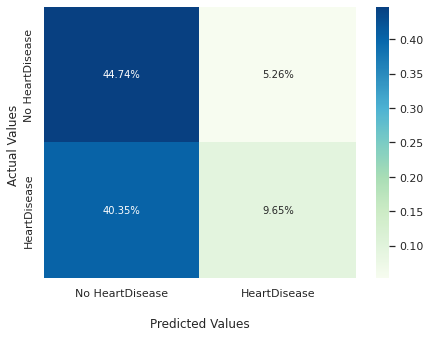

In [66]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='GnBu')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()